In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta

In [2]:
import os
#get working directory in python
os.getcwd()
#change working directory in python
os.chdir("/home/belu/Escritorio/Proyecto_TESIS/reanalysis/BS_otonio")

In [3]:
anios = np.array(["1980_03","1984_04","1990_03","1991_04","1996_05","2000_04","2001_03",
                  "2003_03","2007_03","2008_04","2010_05"])

my_data="ERA_interim_reanalisis_" + anios[0] + "_gep_wind_temp_area2.nc"
fh = Dataset(my_data, mode='r')

In [36]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]
time = fh.variables['time'][:]

#v= fh.variables["v"][:]
#u= fh.variables["u"][:]

v= fh.variables["v"][117,0,:,:]
u= fh.variables["u"][117,0,:,:]

v_units = fh.variables['v'].units
u_units = fh.variables['u'].units


In [37]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [42]:
#como plotear vientos (abajo)
#https://stackoverflow.com/questions/32271278/plot-wind-vectors-with-quiver
fig = plt.figure(figsize=(10,10))

speed=np.sqrt(u*u+v*v)

yy=np.arange(0,len(lat),3)
xx=np.arange(0,len(lon),3)

points=np.meshgrid(yy,xx)

m.quiver(xi,yi,u[117,0],v[117,0],speed[117,0],cmap="jet",latlon=True)

plt.show()



IndexError: index 117 is out of bounds for axis 0 with size 34

<Figure size 720x720 with 0 Axes>

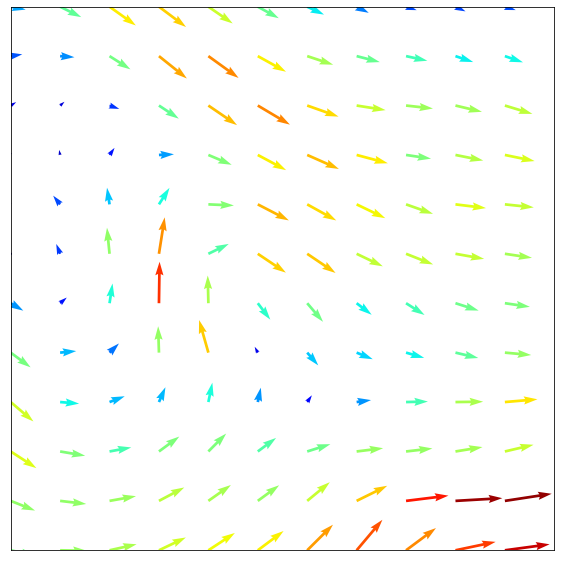

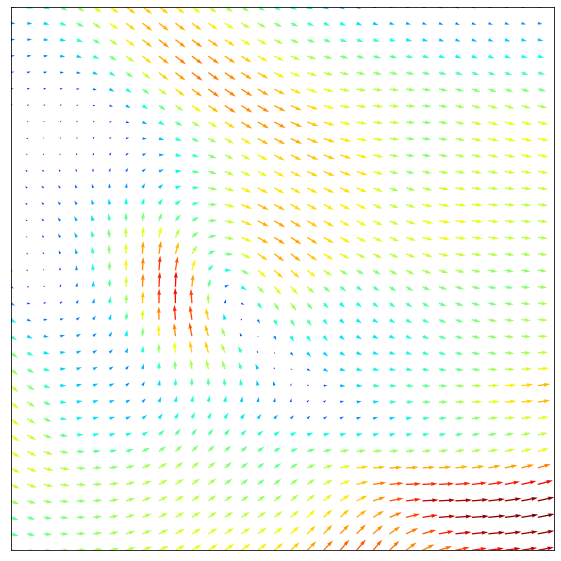

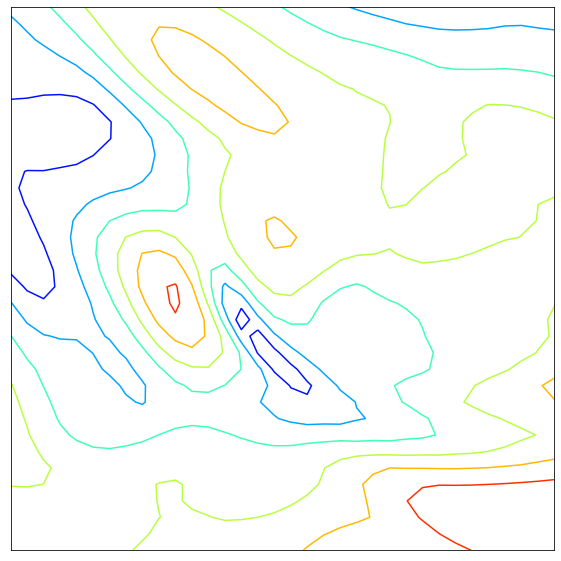

In [49]:
fig = plt.figure(figsize=(10,10))

speed=np.sqrt(u*u+v*v)

yy=np.arange(0,len(lat),3)
xx=np.arange(0,len(lon),3)

points=np.meshgrid(yy,xx)

m.quiver(xi[points],yi[points],u[points],v[points],speed[points],cmap="jet",latlon=True)
plt.show()

# with all points for comparison
fig = plt.figure(figsize=(10,10))

m.quiver(xi,yi,u,v,speed,cmap="jet",latlon=True)
plt.show()

#with countourf or contourf
fig = plt.figure(figsize=(10,10))

speed=np.sqrt(u*u+v*v)
m.contour(xi,yi,speed,cmap="jet",latlon=True)
plt.show()
